## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv", names=["Date", "Language", "Npost"], header=0)
df

,Date,Language,Npost
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df

,Date,Language,Npost
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape
# There are 1991 rows and 3 columns

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()
# See df

Date        1991
Language    1991
Npost       1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby("Language").sum(numeric_only=True)
# See df

,Npost
Language,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
df.groupby("Language").count().sort_values("Npost")
# See df

,Date,Npost
Language,,
go,129,129
swift,135,135
r,142,142
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
# Before
display(df)
df.dtypes

,Date,Language,Npost
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


Date        object
Language    object
Npost        int64
dtype: object

In [9]:
# After

# Convert date in str form to datetime object
df["Date"] = pd.to_datetime(df["Date"])

display(df)
df.dtypes


df

,Date,Language,Npost
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


,Date,Language,Npost
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


## Data Manipulation



In [10]:
test_df = pd.DataFrame(
    {
        "Age": ["Young", "Young", "Young", "Young", "Old", "Old", "Old"],
        "Actor": ["Jack", "Arnold", "Keanu", "Sylvester", "Jack", "Arnold", "Keanu"],
        "Power": [100, 80, 25, 50, 99, 75, 5],
    }
)
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [11]:
# Inspect
display(test_df.shape)
display(test_df.columns)
test_df.head()

(7, 3)

Index(['Age', 'Actor', 'Power'], dtype='object')

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99


In [12]:
# This is a pivoted DataFrame where each column is now a category (actors),
# and each row a value (power) identified by their index (age)
df_pivot = test_df.pivot(index="Age", columns="Actor", values="Power")
df_pivot

# Note that for missing values for pivot tables, pandas will insert a NaN value.

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75.0,99.0,5.0,NaN
Young,80.0,100.0,25.0,50.0


**Mini-challenge**: Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df.  

In [13]:
reshaped_df = df.pivot(index="Date", columns="Language", values="Npost")
reshaped_df.head()

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [14]:
# Inspect
reshaped_df.shape
display(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Language')

In [15]:
display(reshaped_df.head())
reshaped_df.tail()

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [16]:
# By default, .count() ignores NaN values.
reshaped_df.count()

Language
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [17]:
# Replace NaN values with 0 instead.
reshaped_df.fillna(0, inplace=True)

# Run .count() again. This time it should have the same number of entries.
reshaped_df.count()

Language
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [18]:
# Reinspect reshaped_df
reshaped_df.head()

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


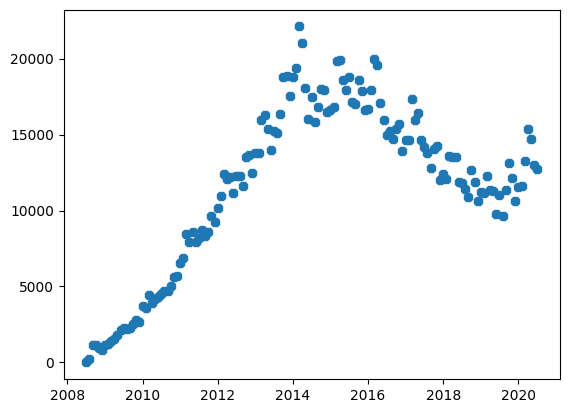

In [19]:
plt.plot(reshaped_df.index, reshaped_df["java"], "8")
plt.show()

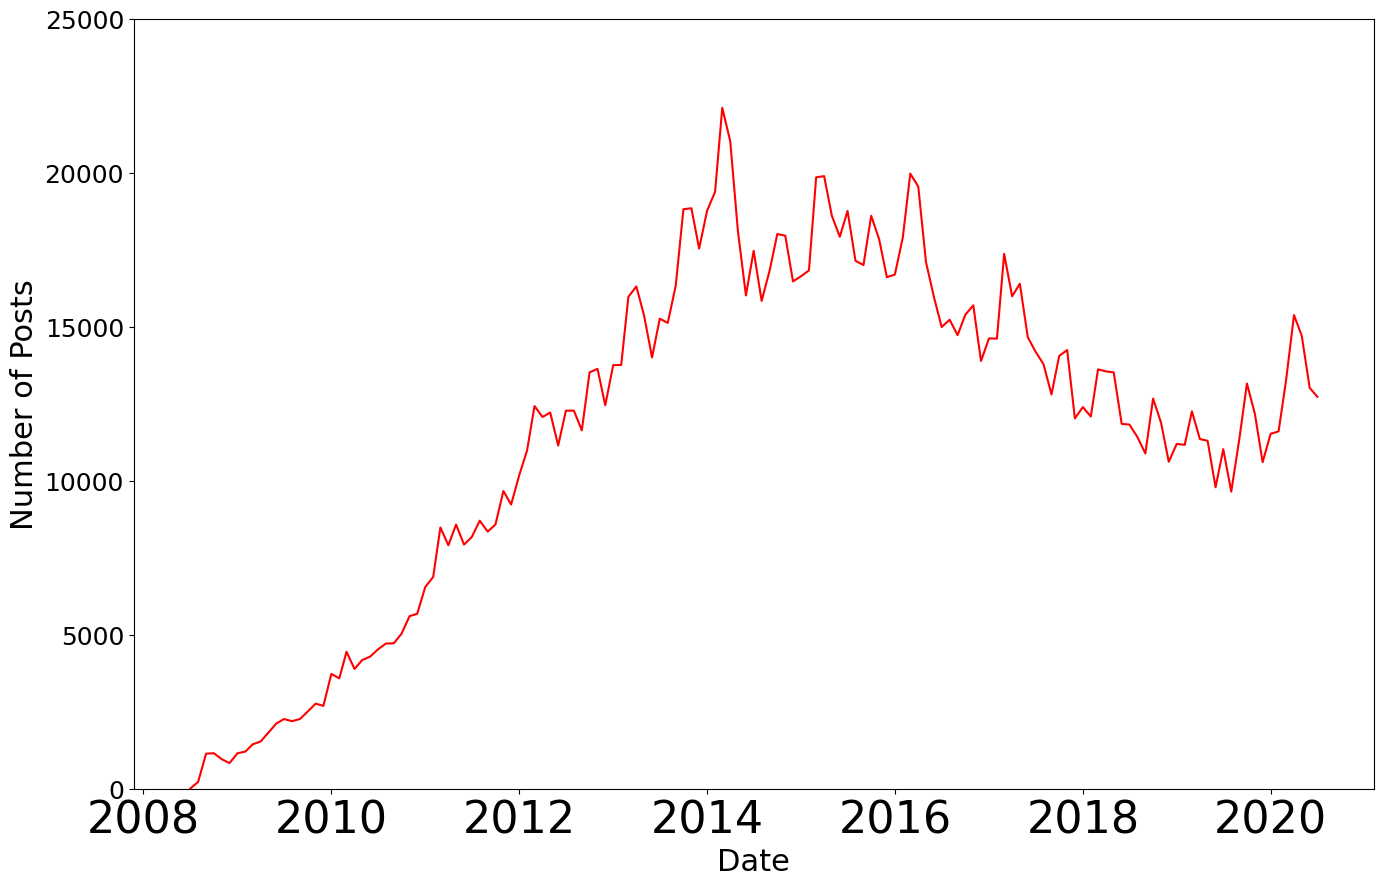

In [20]:
# Play around settings
plt.figure(figsize=(16, 10))

plt.xticks(fontsize=32)
plt.yticks(fontsize=18)

plt.xlabel("Date", fontsize=22)
plt.ylabel("Number of Posts", fontsize=22)

plt.ylim(0, 25000)

plt.plot(reshaped_df["java"], color="red")

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

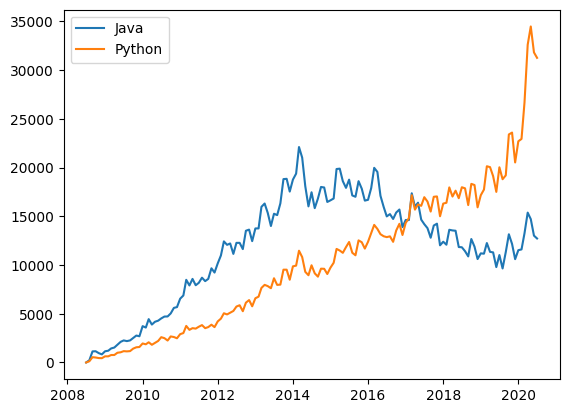

In [21]:
plt.plot(reshaped_df["java"], label="Java")
plt.plot(reshaped_df["python"], label="Python")
plt.legend()

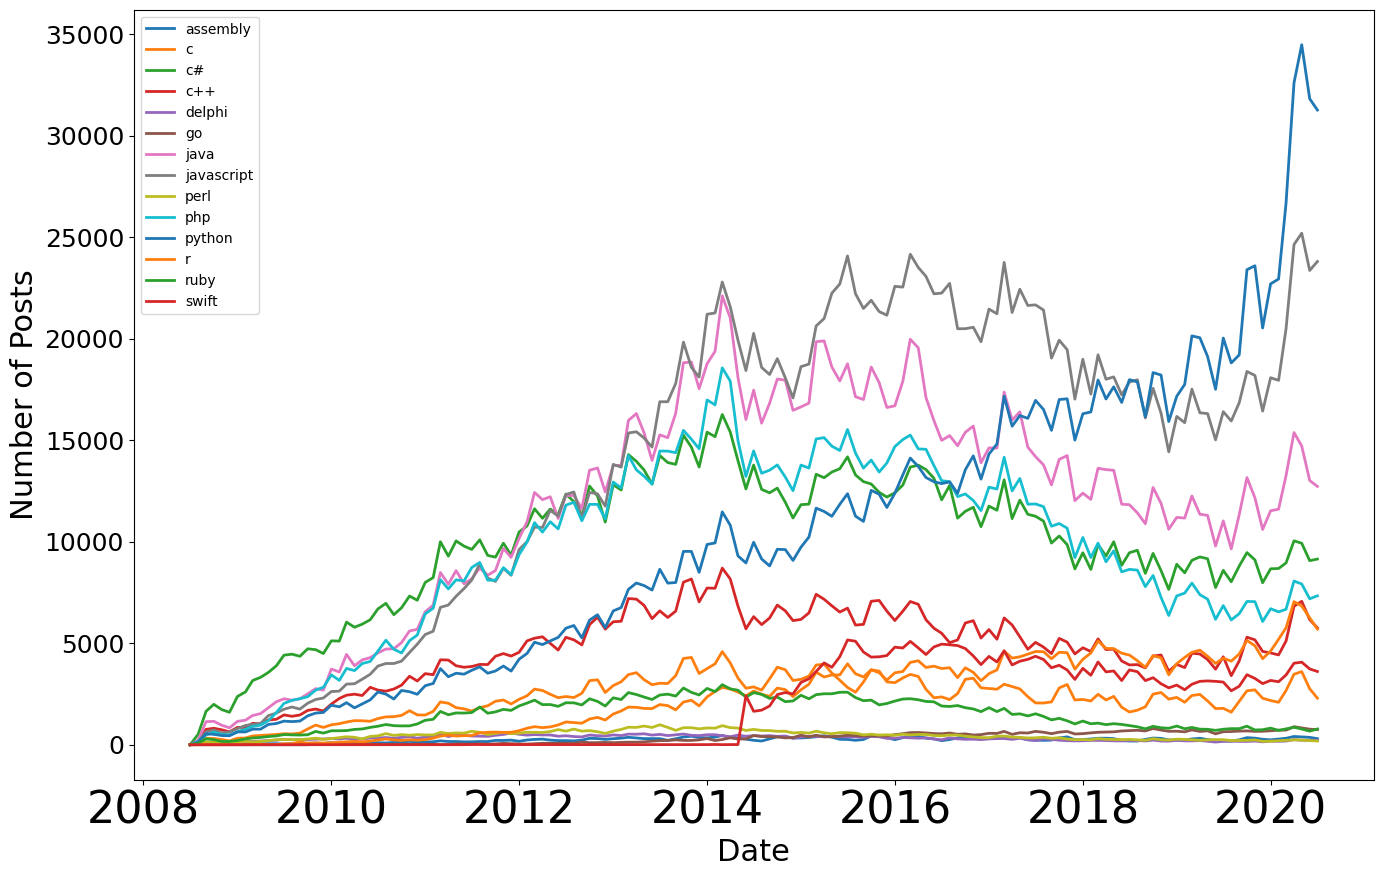

In [22]:
# Play around settings
plt.figure(figsize=(16, 10))

plt.xlabel("Date", fontsize=22)
plt.ylabel("Number of Posts", fontsize=22)

plt.xticks(fontsize=32)
plt.yticks(fontsize=18)


# Plot all
for lang in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[lang], label=lang, linewidth=2)

plt.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [23]:
# Create a DF for rolling mean
roll_df = reshaped_df.rolling(window=6).mean(numeric_only=True)
roll_df.head(10)

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-01,14.333333,192.333333,1246.500000,516.333333,84.333333,0.0,717.000000,455.500000,86.166667,374.166667,344.833333,1.333333,155.500000,0.000000
2009-01-01,18.000000,245.833333,1642.333333,658.500000,111.666667,0.0,908.666667,587.500000,110.666667,480.166667,450.000000,2.666667,190.333333,0.166667
2009-02-01,22.833333,287.000000,1990.333333,772.000000,137.333333,0.0,1073.000000,718.500000,133.500000,581.500000,534.333333,4.166667,226.000000,0.333333
2009-03-01,22.166667,305.166667,2242.500000,822.166667,146.833333,0.0,1123.500000,779.333333,134.833333,651.833333,571.500000,3.833333,232.666667,0.500000


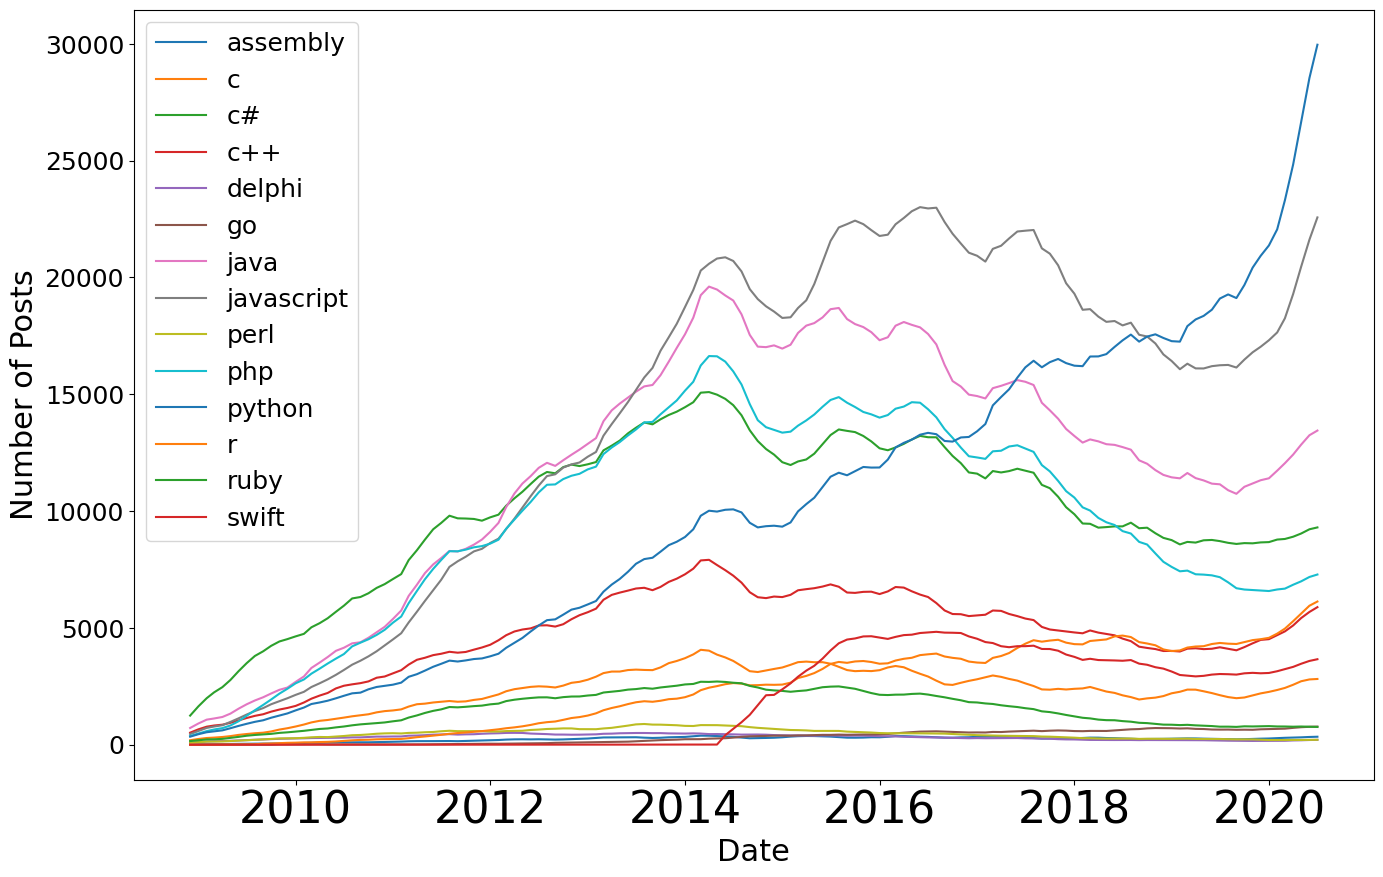

In [24]:
plt.figure(figsize=(16, 10))

plt.xlabel("Date", fontsize=22)
plt.ylabel("Number of Posts", fontsize=22)

plt.xticks(fontsize=32)
plt.yticks(fontsize=18)


for lang in reshaped_df.columns:
    plt.plot(roll_df[lang], label=lang)

plt.legend(fontsize="18")

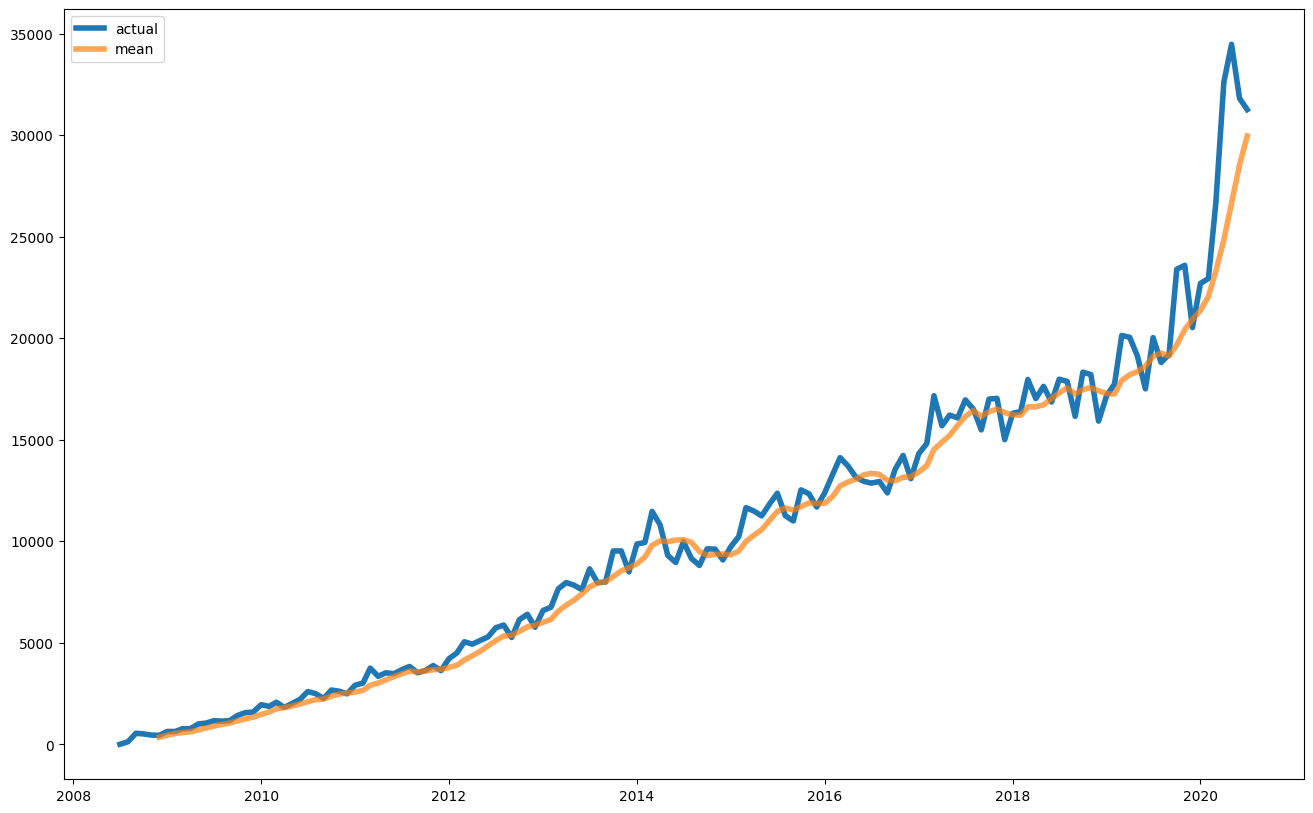

In [25]:
# Rolling mean vs actual
plt.figure(figsize=[16, 10])

roll_df = reshaped_df.rolling(window=6).mean(numeric_only=True)
plt.plot(reshaped_df.index, reshaped_df["python"], linewidth=4, label="actual")
plt.plot(roll_df.index, roll_df["python"], linewidth=4, label="mean",alpha=0.7)
plt.legend()